       ir  lidar
3832   17    726
3833   14    730
3834   14    724
3835   21    724
3836   26    725
...    ..    ...
65155   8    729
65156  25    730
65157  10    731
65158  15    735
65159  19    733

[14175 rows x 2 columns]


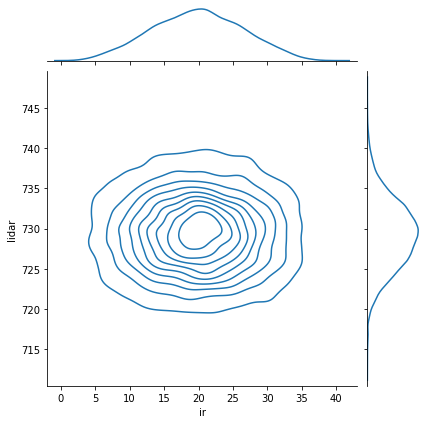

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_700.txt",delimiter = " ",header = None,names = ("date","time","ir","lidar"))

d = data[(data["time"]<160000)&(data["time"]>=120000)] #12時から16時までのデータだけを抽出
d = d.loc[:,["ir","lidar"]]#locというのは値を抽出する関数らしい
print(d)

sns.jointplot(x=d["ir"],y=d["lidar"],data = d,kind = 'kde')
plt.show()

In [2]:
print("光センサの計測値の分散",d.ir.var())
print("LiDARの計測値の分散",d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()

#行列の掛け算だからsumになるわけだな
a = diff_ir*diff_lidar
print("共分散",sum(a)/(len(d)-1))

d.mean()

光センサの計測値の分散 42.117126367699505
LiDARの計測値の分散 17.702026469211596
共分散 -0.31677803385436953


ir        19.860247
lidar    729.311958
dtype: float64

In [3]:
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [4]:
from scipy.stats import multivariate_normal

#平均値がd.mean().values.T、共分散がd.cov().values
irlidar = multivariate_normal(mean = d.mean().values.T,cov=d.cov().values)

[[710. 711. 712. ... 747. 748. 749.]
 [710. 711. 712. ... 747. 748. 749.]
 [710. 711. 712. ... 747. 748. 749.]
 ...
 [710. 711. 712. ... 747. 748. 749.]
 [710. 711. 712. ... 747. 748. 749.]
 [710. 711. 712. ... 747. 748. 749.]]


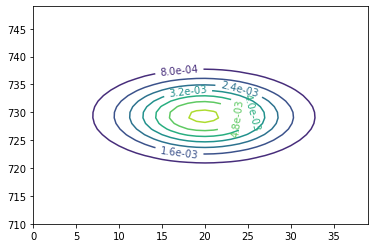

In [29]:
#等高線を描画するスクリプトを書いていく

import numpy as np

x,y = np.mgrid[0:40,710:750] #2次元平面に均等にx,y座標を作る
#print(x.shape +(2,))         #(2,)としないとエラーが出る。違和感あるけどな。
pos = np.empty(x.shape+(2,)) #xは40*40の二次元リストでこれに三次元目を加えて、40*40*2のリストを作成
#rint(pos)
pos[:,:,0] = x
pos[:,:,1] = y

#同じ位置にあるx,yを掛け合わせると、x,y座標になる
#print(x)
#print(y)
print(pos[:,:,1])

cont = plt.contour(x,y,irlidar.pdf(pos))
cont.clabel(fmt = "%1.1e")

plt.show() #描画

[[2.09868292e-07 6.43731712e-07 1.75545049e-06 ... 2.07227757e-23
  8.19319614e-25 2.87994624e-26]
 [1.89053866e-07 6.12650787e-07 1.76508666e-06 ... 1.42643776e-22
  5.95837189e-24 2.21272779e-25]
 [1.62090473e-07 5.54950539e-07 1.68918287e-06 ... 9.34524981e-22
  4.12415569e-23 1.61809789e-24]
 ...
 [2.22169899e-23 5.20726232e-22 1.08507386e-20 ... 1.04312019e-06
  3.15141747e-07 8.46453549e-08]
 [3.21404548e-24 7.95876375e-23 1.75212389e-21 ... 1.15310091e-06
  3.68051217e-07 1.04441910e-07]
 [4.42539468e-25 1.15775046e-23 2.69279638e-22 ... 1.21320298e-06
  4.09113460e-07 1.22653423e-07]]


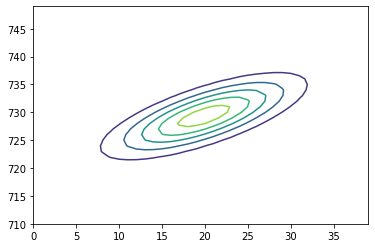

In [33]:
c = d.cov().values + np.array([[0,20],[20,0]])
#print(d.cov().values) 普通に配列に足してるだけか。

#oythonで多変量正規分布に従う乱数を生成する
tmp = multivariate_normal(mean = d.mean().values.T,cov = c)
cont = plt.contour(x,y,tmp.pdf(pos))
print(tmp.pdf(pos))
plt.show()